# Tarea 3 Cadenas de Markov


Autores: 
- Daniel Alejandro García Hernández
- David Camilo Cortes Salazar

En este notebook se encuentra una implementación de algunos resultados vistos en clase para el Gibbs Sampler aplicado a Hard-core y q-colorings. 

Las librerías necesarias para ejectuar el código son:

In [28]:
import numpy as np
import random
import matplotlib.pyplot as plt
from pprint import pprint

# Modelo de Ising  usando MCMC y Algoritmo de Propp - Wilson

### Muestras del modelo de Ising con inverso de temperatura usando MCMC

Iniciamos creando la grilla del módelo. Para esto, creamos una matriz 2x2 apoyandonos en la libreria Numpy y la declaramos de tamaño $kxk$. las dimensiones del grafo. $10\leq k \leq 20$.

Tambien creamos una lista con los beetas que vamos a evaluar y otra con los diferentes numeros de pasos con los que ejecturemos el algoritmo.

In [13]:
k = 10
beta_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5]#, 0.6, 0.7, 0.8, 0.9, 1]
steps_list = [10**3, 10**4, 10**5]
n_muestras = 100

Ahora recordemos como se calculaba la energia del sistema dada una configuracion. Esto esta dado por la funcion $H(\eta)$ descrita acontinuacion:

$$H(\eta)=-\sum_{x\thicksim y}\eta_{x}\eta_{y}$$

D0onde $\eta$ es la configuracion actual del sistema y $\eta_{x}$, $\eta_{y}$ son la posicion de dos nodos de $\eta$ tal que $x$ y $y$ estan conectados.

Con esto en mente creamos una funcion que calcula la energia del sistema dada una configuracion $\eta$ del modelo.

In [3]:
def calcular_energia(G):
    """
    Calcula la energia de la configuracion dada. Primero se suman enlaces horizontales, luego verticales
    """ 
    energia = 0
    k = len(G)
    
    ## Suma sobre enlaces horizontales
    for ii in range(k):
        for jj in range(k-1):
            energia += G[ii,jj] * G[ii,jj+1]
            
    ## Suma sobre enlaces verticales
    for ii in range(k-1):
        for jj in range(k):
            energia += G[ii,jj] * G[ii+1,jj]
    

    return -1 * energia

Ahora usemos un gibbs sampler para implementar el metodo de montecarlo en nuestro problema. Este funcionara de la siguiente manera:

- Seleccione un vertice al azar $\~{x}$ de la configurtacion actual $\eta$.
- Cambie el valor del vertice escogido (Si el vertice es 1, cambie por -1 y viceversa). Esto para obtener una nueva configuracion $\hat{\eta}$ del sistema.
- Calcule la diferencia de energia de la configuracion $\eta$.
- Calcule la probabilidad de cambio de $\eta$ utilizando la probabilidad de distribucion del vetice $\~{x}$: 

$$ \Delta \pi = \frac{\exp^{2\beta (k_{+}(\~x, \eta)-k_{-}(\~x, \eta))}}{\exp^{2\beta (k_{+}(\~x, \eta)-k_{-}(\~x, \eta))} + 1} $$

- Genere un numero aleatorio uniforme $u$ entre 0 y 1
- Si $u < \Delta \pi$, acepta la nueva configuracion. Si no, mantenemos con la configuracion $\eta$.
- Repetimos el algoritmo hasta completar las iteraciones propuestas.

Note que el calculo de la energia deja de aparecer directamenete en el algoritmo, y aparece la diferencia entre la acumulacion de cargas positivas y negativas alrededor de un vertice dado.

A continuacion, creamos una nueva funcion para el calculo de esta acumulacion y otra para la probabiliadad de cambio:

In [4]:
def calcular_diferencia_energia(G, k, x, y):
    # Calcula la diferencia de la energia en la configuracion dada
    energia = 0
    if x != 0:
        energia += G[x-1, y]
    if x != k-1:
        energia += G[x+1, y]
    if y != 0:
        energia += G[x, y-1]
    if y != k-1:
        energia += G[x, y+1]
    return energia

def calcular_probabilidad(beta, energia):
    # Calcula la probabilidad de cambio de la nueva configuracion
    e = np.exp(2 * beta * energia)
    return e / (e+1)

Y con esto creamos el Gibbs sampler para nuestro modelo:

In [5]:
def gibbs_sampler_mcmc(G, beta, iteraciones, k):
    for _ in range(iteraciones):
        
        # Selecciona spin aleatorio
        x = random.randint(0,k-1)
        y = random.randint(0,k-1)

        # Calcula la energia de la configuracion actual y siguiente segun el spin dado

        diferencia_energia = calcular_diferencia_energia(G, k, x, y)
        
        # Evalua el cambio
        prob_cambio = calcular_probabilidad(beta, diferencia_energia)

        # Condicion de Cambio
        if np.random.rand() < prob_cambio:
            G[x, y] = 1 # Cambia el spin
        else: 
            G[x, y] = -1# Cambia el spin
    
    return G

Ahora solo nos queda probar el algoritmo con los valores de beta y pasos del gibbs sampler que definimos al inicio para obtener el numero de muestras deseadas

In [6]:
configuraciones_mcmc = {}

# Loop principal
for step in steps_list: # Beta a utilizar
    configuraciones_mcmc[step] = {key: [] for key in beta_list}
    for beta in beta_list: # Numero de pasos a utilizar
        for _ in range(n_muestras): # Numero de muestras a guardar
            G = np.random.choice([-1, 1], size=(k, k))  # Configuración inicial aleatoria
            configuraciones_mcmc[step][beta].append(gibbs_sampler_mcmc(G, beta, step, k).copy())  # Guarda la configuracion final
        print(f"Guardado {n_muestras} muestras con X = {step} para beta = {beta}")

Guardado 100 muestras con X = 1000 para beta = 0
Guardado 100 muestras con X = 1000 para beta = 0.1
Guardado 100 muestras con X = 1000 para beta = 0.2
Guardado 100 muestras con X = 1000 para beta = 0.3
Guardado 100 muestras con X = 1000 para beta = 0.4
Guardado 100 muestras con X = 1000 para beta = 0.5
Guardado 100 muestras con X = 10000 para beta = 0
Guardado 100 muestras con X = 10000 para beta = 0.1
Guardado 100 muestras con X = 10000 para beta = 0.2
Guardado 100 muestras con X = 10000 para beta = 0.3
Guardado 100 muestras con X = 10000 para beta = 0.4
Guardado 100 muestras con X = 10000 para beta = 0.5
Guardado 100 muestras con X = 100000 para beta = 0
Guardado 100 muestras con X = 100000 para beta = 0.1
Guardado 100 muestras con X = 100000 para beta = 0.2
Guardado 100 muestras con X = 100000 para beta = 0.3
Guardado 100 muestras con X = 100000 para beta = 0.4
Guardado 100 muestras con X = 100000 para beta = 0.5


### Muestras del modelo de Ising con inverso de temperatura usando Prop-Wilson

Usaremos los mismos valores tomados anteriormente para hacer una comparacion mas adelante entre las muetras de propp - wilson y mcmc.

Las funciones de acumulacion y probabilidad son las mismas, aqui cambia el metodo de aplicar el gibbs sapler. Usaremos sadwiching para la implementacion de el algoritmo de Propp-Wilson sobre las cofiguraciones $\eta_{min}$ (Todos -1) y $\eta_{max}$ (Todos 1). Y para este, nos hace falta:

- Una secuencia creciente de numeros enteros positivos: $\space N = \{N_{1}, N_{2}, ... \}$.
- Una secuencia de numeros aleatorios uniformemente distribuidos en $[0, 1]$: $\space U = \{U_{0}, U_{-1}, ... \}$.
- Dos secuencias de numeros aleatorios uniformemente distribuidos en $[0, k-1]$: $\space \~U = \{ \~U_{0}, \~U_{-1}, ... \}\space$ y $ \space \~U^ = \{ \~U^{'}_{0}, \~U^{'}_{-1}, ... \}$.

La secuencia N nos servira para seleccionar los elementos de las sucesiones aleatorias. Tomaremos $N_{n} = 2^{n}$. La secuencia U, dicatara los valores a comparar con las probabilidades de cambio de los sistemas $\eta_{min}$ y $\eta_{max}$. Y las secuencias $U$ y $\~U$ seran las encargadas de seleccionar las cordenadas $\~x$ e $\~y$ del vertices a evaluar.

Para esto, cremos la siguiente clase:


In [ ]:
class Random_sequence:
    def __init__(self, k):
        self.k = k
        self.N = 0 # indice de la sucesion de numeros creciente (N)
        self.U_float = np.zeros((0,), dtype=float)
        self.U_int = np.zeros((0,2), dtype=int)

    def update_random(self, sig_N):
        self.U_float.resize((sig_N,))
        self.U_int.resize((sig_N,2))
        self.U_float[self.N:] = np.random.random((sig_N - self.N,))
        self.U_int[self.N:] = np.random.randint(0, self.k, size=(sig_N - self.N,2))
        self.N = sig_N

Esta clase funciona nos asegura generar numeros aleatorios nuevos en cada paso del gibbs sampler y seleccionar los correspondientes segun la secuencia dada. Ademas, estos valores se guardan en los arreglos creados y nos permiten ver el registro historico de elementos aleatorios seleccionados.


Ahora podemos crear nuestro Gibbs Sampler usando Propp-Wilson:

In [16]:
def gibbs_sampler_pw(k, beta):

    N = 1 # indice de la sucesion de numeros creciente
    rand_sequence = Random_sequence(k) # Clase de generacion y memoria de numeros aleatorios usados
    rand_sequence.update_random(N) # genera primeros numeros aleatorios

    #coalecencia
    times = 0

    # Configuraciones extremas\n",
    G_max = np.ones((k, k))
    G_min = -np.ones((k, k))

    while True:
        
        top_size = rand_sequence.U_float.size
        
        for i in range(top_size):
            times += 1

            m = top_size - i - 1 # indice de la secuencia aleatoria

            x = rand_sequence.U_int[m, 0] # Numero aleatorio dado por la secuencia de enteros
            y = rand_sequence.U_int[m, 1] # Numero aleatorio dado por la secuencia de enteros

            # Sandwiching\n",

            delta_energia_min = calcular_diferencia_energia(G_min, k, x, y)
            delta_energia_max = calcular_diferencia_energia(G_max, k, x, y)

            prob_cambio_max = calcular_probabilidad(beta, delta_energia_max)
            prob_cambio_min = calcular_probabilidad(beta, delta_energia_min)

            rand_to_prob = rand_sequence.U_float[m] # Numero aleatorio dado por la secuencia de flotantes

            # Condicion de Cambio G1\n",
            if rand_to_prob < prob_cambio_max:
                G_max[x, y] = 1 
            else: 
                G_max[x, y] = -1

            # Condicion de Cambio G2\n",
            if rand_to_prob < prob_cambio_min:
                G_min[x, y] = 1 
            else:
                G_min[x, y] = -1 

        # Verifica coalecencia\n",
        if np.array_equal(G_min, G_max):
            return G_min, times
        else:
            N = max(N+1, N*2) # sucesion de potencias de 2
            rand_sequence.update_random(N) # genera nuevos numeros aleatorios


Ahora generamos las muestras deseadas con los valores de beta dados

In [8]:
configuraciones_pw = {}
tiempos_coalecencia = {}

k = 10

# Loop principal\n",
for beta in beta_list: # Beta a utilizar
    configuraciones_pw[beta] = []
    tiempos_coalecencia[beta] = []
    for _ in range(100): # Numero de muestras a guardar
        data = gibbs_sampler_pw(k, beta)
        configuraciones_pw[beta].append(data[0].copy())  # Guarda la configuracion final
        tiempos_coalecencia[beta].append(data[1])  # Guarda el tiempo de coalecencia
    print(f"Guardado {n_muestras} muestras para beta = {beta}")

### Estimacion valor esperado de magnetismo en modelo de Isnig

Con las muestras que tenemos, vamos a comparar los resultados generados con Monnte Carlo Markov Chains y los generados con Propp-Wilson. La primera parte para esto es calcular el magnetismo de cada una de las muestras encontradas, esto se hace usando la siguiente formula:

$$M(\eta) = \frac{1}{|V_{k}|}\sum_{x \in V_{k}} \eta_{x}$$

Vea que para nuestro caso $|V_{k}| = k^{2}$, luego tenemos la siguiente funcion:

In [30]:
def calcular_magnetismo(k, configuraciones):
    magnetismo_list = {}
    for beta in beta_list:
        magnetismo_list[beta] = []
        for config in configuraciones[beta]:
            magnetismo_list[beta].append(np.abs(np.sum(config)/(k**2)))
    return magnetismo_list

magnetismo_mcmc_list = {} # Lista por numero de pasos de Magnetismo en mustras de mcmc
for step in steps_list:
    magnetismo_mcmc_list[step] = calcular_magnetismo(k, configuraciones_mcmc[step]) # Magnetismo muestras mcmc

magnetismo_pw = calcular_magnetismo(k, configuraciones_pw) # Magnetismo muestras pw

for step in steps_list:
    print(f"Magnetismo usando MCMC con X = {step}: {magnetismo_mcmc_list[step]}")

print(f"Magnetismo usando PW: {magnetismo_pw}")

Magnetismo usando MCMC con X = 1000: {0: [0.18, 0.04, 0.0, 0.02, 0.14, 0.14, 0.04, 0.06, 0.06, 0.06, 0.16, 0.06, 0.1, 0.08, 0.06, 0.06, 0.04, 0.18, 0.04, 0.04, 0.2, 0.02, 0.02, 0.16, 0.02, 0.08, 0.0, 0.08, 0.04, 0.06, 0.16, 0.06, 0.2, 0.02, 0.06, 0.08, 0.04, 0.14, 0.02, 0.12, 0.14, 0.0, 0.04, 0.18, 0.12, 0.1, 0.1, 0.18, 0.16, 0.12, 0.04, 0.1, 0.08, 0.2, 0.02, 0.04, 0.06, 0.0, 0.08, 0.06, 0.06, 0.02, 0.08, 0.02, 0.08, 0.08, 0.08, 0.04, 0.18, 0.12, 0.08, 0.06, 0.16, 0.14, 0.04, 0.12, 0.04, 0.04, 0.12, 0.06, 0.02, 0.12, 0.14, 0.0, 0.08, 0.06, 0.06, 0.08, 0.18, 0.14, 0.06, 0.08, 0.12, 0.06, 0.04, 0.12, 0.04, 0.08, 0.1, 0.12], 0.1: [0.1, 0.04, 0.08, 0.12, 0.08, 0.0, 0.0, 0.0, 0.06, 0.0, 0.08, 0.06, 0.08, 0.0, 0.02, 0.14, 0.26, 0.22, 0.18, 0.02, 0.0, 0.06, 0.14, 0.16, 0.22, 0.04, 0.1, 0.06, 0.2, 0.04, 0.14, 0.08, 0.02, 0.06, 0.02, 0.04, 0.14, 0.2, 0.1, 0.3, 0.12, 0.02, 0.1, 0.06, 0.0, 0.1, 0.08, 0.06, 0.12, 0.04, 0.04, 0.3, 0.1, 0.02, 0.02, 0.12, 0.12, 0.04, 0.0, 0.1, 0.18, 0.2, 0.08, 0.06, 

Ahora calculamos una aproximacion dada con estas muestras de el valor esperado de este magnetismo usando el siguiente resultado:

$$E[M(\eta)] \approx \frac{1}{X} \sum_{k=1}^{X}M(\eta_{k})$$

donde $X$ es el numero de muestras y que en nuestro caso es $100$. Así, creamos la siguiente funcion:

In [39]:
def valor_esperado_aproximado(magnetismo, n_muestras):
    vesperado_list = {}
    for beta in beta_list:
        vesperado_list[beta] = np.sum(magnetismo[beta])/n_muestras
    
    return vesperado_list

vesperado_mcmc_list = {} # Lista por numero de pasos de valor esperado en mustras de mcmc
for step in steps_list:
    vesperado_mcmc_list[step] = valor_esperado_aproximado(magnetismo_mcmc_list[step], n_muestras) # valor esperado muestras mcmc

vesperado_pw = valor_esperado_aproximado(magnetismo_pw, n_muestras) # valor esperado muestras pw

for step in steps_list:
    print(f"Valor esperado usando MCMC con X = {step}:")
    pprint(vesperado_mcmc_list[step])

print("Valor esperado usando PW: ")
pprint(vesperado_pw)


Valor esperado usando MCMC con X = 1000:
{0: 0.0828,
 0.1: 0.08579999999999999,
 0.2: 0.13280000000000003,
 0.3: 0.1612,
 0.4: 0.2612,
 0.5: 0.3282}
Valor esperado usando MCMC con X = 10000:
{0: 0.0774,
 0.1: 0.09480000000000001,
 0.2: 0.12360000000000002,
 0.3: 0.17279999999999998,
 0.4: 0.30140000000000006,
 0.5: 0.6474000000000001}
Valor esperado usando MCMC con X = 100000:
{0: 0.06820000000000001,
 0.1: 0.09060000000000003,
 0.2: 0.12359999999999999,
 0.3: 0.16920000000000002,
 0.4: 0.3276,
 0.5: 0.618}
Valor esperado usando PW: 
{0: 0.085,
 0.1: 0.08719999999999999,
 0.2: 0.12680000000000002,
 0.3: 0.19580000000000003,
 0.4: 0.3286,
 0.5: 0.6842}


## Reporte

### Coalescencia

In [66]:
pprint(tiempos_coalecencia)

{0: [2047,
     1023,
     2047,
     2047,
     1023,
     1023,
     1023,
     1023,
     1023,
     2047,
     1023,
     2047,
     1023,
     2047,
     1023,
     1023,
     2047,
     1023,
     2047,
     1023,
     1023,
     1023,
     1023,
     1023,
     2047,
     1023,
     1023,
     1023,
     2047,
     2047,
     1023,
     1023,
     2047,
     2047,
     1023,
     2047,
     1023,
     2047,
     1023,
     2047,
     1023,
     1023,
     1023,
     2047,
     2047,
     1023,
     1023,
     1023,
     1023,
     1023,
     1023,
     1023,
     2047,
     1023,
     1023,
     2047,
     1023,
     2047,
     1023,
     1023,
     1023,
     1023,
     2047,
     2047,
     2047,
     1023,
     1023,
     1023,
     2047,
     2047,
     2047,
     1023,
     1023,
     2047,
     1023,
     1023,
     1023,
     1023,
     2047,
     1023,
     1023,
     2047,
     1023,
     1023,
     1023,
     2047,
     2047,
     1023,
     1023,
     1023,
     2047,

### Comparacion estimativas

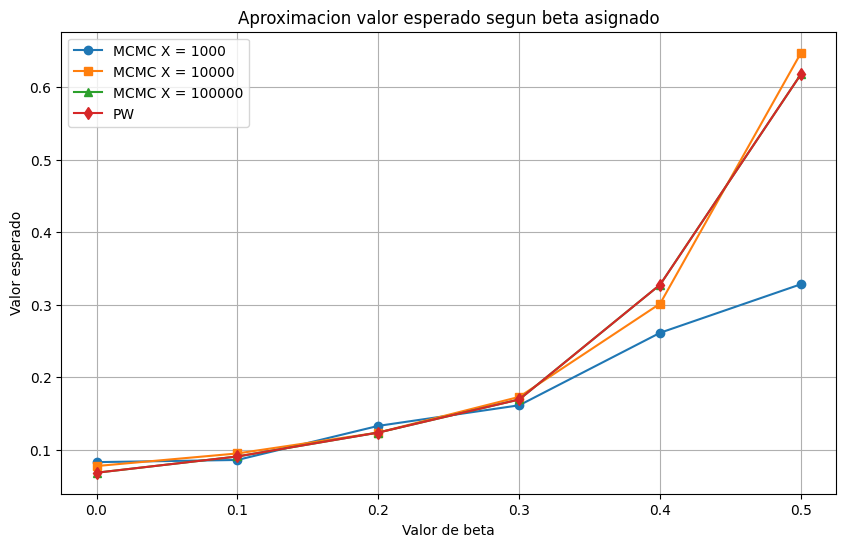

In [65]:
# Crear la gráfica
plt.figure(figsize=(10, 6))

marker_list = ['o', 's', '^', 'd']
label_list = [
        "MCMC X = 1000",
        "MCMC X = 10000",
        "MCMC X = 100000",
        "PW"
]

resultados = {step: [] for step in steps_list}
resultados['pw'] = []
for beta in beta_list:
    for step in steps_list:
        resultados[step].append(vesperado_mcmc_list[step][beta])
    resultados['pw'].append(vesperado_mcmc_list[step][beta])

b = 0
for key in resultados:
    plt.plot(beta_list, resultados[key], marker=marker_list[b], label=label_list[b])
    b += 1


# Añadir títulos y etiquetas
plt.title('Aproximacion valor esperado segun beta asignado')
plt.xlabel('Valor de beta')
plt.ylabel('Valor esperado')

# Añadir la leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()
